In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from ipywidgets import widgets
import seaborn as sns
from scipy.signal import find_peaks

In [2]:
df = pd.read_excel("Consumo horario Zonas de carga de la GCROC 2015-2019.xlsx", sheet_name="datos")

In [3]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,consumo de energía de la zona de carga (MWh),Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,NaT,día de la semana,fecha,hora,ZCCI84BA14,ZCCI72BA72,ZCCI47BA64,ZCCI52BA20,ZCCI12CN54,ZCCI48CN27,...,ZCCI94JN17,ZCCI47JN87,ZCCI99JN69,ZCCI49JN14,ZCCI65JN47,ZCCI38JN61,ZCCI14QS65,ZCCI79QS2,ZCCI67QS47,ZCCI18CO76
1,2015-08-20,Jueves,2015-08-20 00:00:00,1,552.609,490.27,357.488,NaN,402.587,94.7682,...,282.895,855.283,NaN,NaN,261.085,71.5379,NaN,402.58,283.748,NaN
2,2015-08-20,NaN,NaN,2,546.262,468.488,334.402,NaN,387.418,94.0371,...,285.979,828.104,NaN,NaN,247.134,68.3344,NaN,391.484,276.328,NaN
3,2015-08-20,NaN,NaN,3,533.782,451.496,323.227,NaN,391.746,95.0278,...,289.796,821.102,NaN,NaN,237.034,64.516,NaN,381.678,273.986,NaN
4,2015-08-20,NaN,NaN,4,496.88,435.796,318.112,NaN,389.48,95.0814,...,291.609,814.015,NaN,NaN,229.384,62.7311,NaN,373.947,267.397,NaN


In [4]:
df.columns = df.iloc[0]
df = df.drop(index=0)
df.rename(columns = {"día de la semana" : "día_semana"}, inplace=True )
df.rename(columns = {pd.NaT : "fechas"}, inplace = True)

In [5]:
df.head()

,fechas,día_semana,fecha,hora,ZCCI84BA14,ZCCI72BA72,ZCCI47BA64,ZCCI52BA20,ZCCI12CN54,ZCCI48CN27,...,ZCCI94JN17,ZCCI47JN87,ZCCI99JN69,ZCCI49JN14,ZCCI65JN47,ZCCI38JN61,ZCCI14QS65,ZCCI79QS2,ZCCI67QS47,ZCCI18CO76
1,2015-08-20,Jueves,2015-08-20 00:00:00,1,552.609,490.27,357.488,NaN,402.587,94.7682,...,282.895,855.283,NaN,NaN,261.085,71.5379,NaN,402.58,283.748,NaN
2,2015-08-20,NaN,NaN,2,546.262,468.488,334.402,NaN,387.418,94.0371,...,285.979,828.104,NaN,NaN,247.134,68.3344,NaN,391.484,276.328,NaN
3,2015-08-20,NaN,NaN,3,533.782,451.496,323.227,NaN,391.746,95.0278,...,289.796,821.102,NaN,NaN,237.034,64.516,NaN,381.678,273.986,NaN
4,2015-08-20,NaN,NaN,4,496.88,435.796,318.112,NaN,389.48,95.0814,...,291.609,814.015,NaN,NaN,229.384,62.7311,NaN,373.947,267.397,NaN
5,2015-08-20,NaN,NaN,5,467.29,433.536,316.349,NaN,395.082,96.3543,...,294.238,825.673,NaN,NaN,232.523,61.3773,NaN,377.615,270.692,NaN


In [6]:
dia_sem = df["día_semana"].tolist()
fech = df["fecha"].tolist()
hor = df["hora"].tolist()
indx = 0
for h in hor:
    if h == 1:
        fecha = fech[indx]
        diaa = dia_sem[indx]
        indx += 1
    elif h != 1:
        fech[indx] = fecha
        dia_sem[indx] = diaa
        indx += 1
df["fecha"] = fech
df["día_semana"] = dia_sem
df.head()

,fechas,día_semana,fecha,hora,ZCCI84BA14,ZCCI72BA72,ZCCI47BA64,ZCCI52BA20,ZCCI12CN54,ZCCI48CN27,...,ZCCI94JN17,ZCCI47JN87,ZCCI99JN69,ZCCI49JN14,ZCCI65JN47,ZCCI38JN61,ZCCI14QS65,ZCCI79QS2,ZCCI67QS47,ZCCI18CO76
1,2015-08-20,Jueves,2015-08-20,1,552.609,490.27,357.488,NaN,402.587,94.7682,...,282.895,855.283,NaN,NaN,261.085,71.5379,NaN,402.58,283.748,NaN
2,2015-08-20,Jueves,2015-08-20,2,546.262,468.488,334.402,NaN,387.418,94.0371,...,285.979,828.104,NaN,NaN,247.134,68.3344,NaN,391.484,276.328,NaN
3,2015-08-20,Jueves,2015-08-20,3,533.782,451.496,323.227,NaN,391.746,95.0278,...,289.796,821.102,NaN,NaN,237.034,64.516,NaN,381.678,273.986,NaN
4,2015-08-20,Jueves,2015-08-20,4,496.88,435.796,318.112,NaN,389.48,95.0814,...,291.609,814.015,NaN,NaN,229.384,62.7311,NaN,373.947,267.397,NaN
5,2015-08-20,Jueves,2015-08-20,5,467.29,433.536,316.349,NaN,395.082,96.3543,...,294.238,825.673,NaN,NaN,232.523,61.3773,NaN,377.615,270.692,NaN


In [7]:
df['year'] = pd.DatetimeIndex(df["fechas"]).year
df['month'] = pd.DatetimeIndex(df["fechas"]).month
df['day'] = pd.DatetimeIndex(df["fechas"]).day

In [8]:
df = df.replace(["Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sabado", "Domingo"], [0, 1, 2, 3, 4, 5, 6])
df = df.replace(["Miércoles", "Sábado"],[2,5])

In [9]:
df.tail(20)

,fechas,día_semana,fecha,hora,ZCCI84BA14,ZCCI72BA72,ZCCI47BA64,ZCCI52BA20,ZCCI12CN54,ZCCI48CN27,...,ZCCI49JN14,ZCCI65JN47,ZCCI38JN61,ZCCI14QS65,ZCCI79QS2,ZCCI67QS47,ZCCI18CO76,year,month,day
35861,2019-09-21 23:59:59.997,6,2019-09-21 23:59:59.997,5,519.563930,440.184612,326.333483,102.350467,445.088794,208.631680,...,70.613025,327.781308,79.900917,88.935929,634.788965,194.644064,32.301716,2019,9,21
35862,2019-09-21 23:59:59.997,6,2019-09-21 23:59:59.997,6,485.990245,435.963163,325.951682,101.314028,448.408840,206.827407,...,71.237659,322.026125,79.172873,89.206855,625.003166,197.795171,32.886400,2019,9,21
35863,2019-09-21 23:59:59.997,6,2019-09-21 23:59:59.997,7,514.698963,431.330436,333.312784,102.525819,447.469507,209.042489,...,74.409074,321.847328,81.672826,90.589474,620.507603,205.362410,33.768957,2019,9,21
35864,2019-09-21 23:59:59.997,6,2019-09-21 23:59:59.997,8,532.820342,427.949520,335.953481,106.876841,434.094885,210.846876,...,76.710594,320.774268,86.323404,84.770002,624.584376,205.070827,34.771205,2019,9,21
35865,2019-09-21 23:59:59.997,6,2019-09-21 23:59:59.997,9,493.729742,424.285058,338.555871,107.707382,433.253372,216.753222,...,77.960722,311.361133,91.112563,87.222207,624.686327,207.036502,35.576553,2019,9,21
35866,2019-09-21 23:59:59.997,6,2019-09-21 23:59:59.997,10,534.997786,439.199045,354.243191,112.498506,443.697846,223.566241,...,82.479563,320.966375,95.518988,87.367179,642.342309,209.388701,37.325903,2019,9,21
35867,2019-09-21 23:59:59.997,6,2019-09-21 23:59:59.997,11,479.456871,436.775630,367.919481,101.302105,452.489357,230.435493,...,85.136214,333.716336,98.025259,86.862519,654.863901,211.320171,38.029723,2019,9,21
35868,2019-09-21 23:59:59.997,6,2019-09-21 23:59:59.997,12,545.813438,442.144014,375.500173,90.938051,452.672495,234.999284,...,84.805516,342.379106,98.470980,87.649313,662.758230,212.950500,38.005004,2019,9,21
35869,2019-09-21 23:59:59.997,6,2019-09-21 23:59:59.997,13,532.339912,447.895891,381.394782,88.707199,453.159171,233.250110,...,84.409774,345.219979,93.040262,84.687580,668.747370,214.620888,37.315865,2019,9,21
35870,2019-09-21 23:59:59.997,6,2019-09-21 23:59:59.997,14,529.644501,450.796194,382.885194,87.262805,453.416539,231.431507,...,85.660127,349.143555,92.707430,84.679172,670.653984,217.090921,35.253584,2019,9,21


In [10]:
df = df.drop(["fecha","fechas"], axis=1)
df = df.dropna()

In [11]:
zonas = df.columns
elim = ["día_semana", "hora", "day", "year", "month"]
zonas = zonas.drop(elim)
son = ["zona_{}".format(i+1) for i in range(len(zonas))]
listDic={}
for zona, so in zip(zonas, son):
    listDic[zona]=so
df.rename(columns = listDic, inplace=True )
df.head()

,día_semana,hora,zona_1,zona_2,zona_3,zona_4,zona_5,zona_6,zona_7,zona_8,...,zona_20,zona_21,zona_22,zona_23,zona_24,zona_25,zona_26,year,month,day
2473,1,1,586.355954,440.413395,390.165749,92.227128,431.128498,137.563541,60.004246,569.569445,...,50.751099,284.093558,84.253804,35.907851,573.658374,232.075271,26.129796,2015,12,1
2474,1,2,534.674964,436.788257,354.979734,89.055159,422.386585,135.081111,60.753357,582.170888,...,64.692998,269.313174,86.163512,36.665166,518.169466,231.872994,27.073641,2015,12,1
2475,1,3,586.773471,410.820258,329.388087,88.308842,389.575364,126.479479,53.946456,571.150180,...,61.499443,260.163608,85.744744,33.292836,487.563347,210.873154,31.921941,2015,12,1
2476,1,4,553.468104,394.362273,324.136570,93.767899,368.112707,120.249723,47.278441,551.203493,...,58.065259,240.661857,82.420562,29.276688,468.104578,194.173398,27.477886,2015,12,1
2477,1,5,445.710449,392.564709,328.280212,101.873666,356.035860,116.066548,43.860122,543.828653,...,58.405893,237.813743,82.013899,26.761496,462.162629,184.676695,33.143631,2015,12,1


In [12]:
df2 = df.copy()

In [13]:
def ffest():
    import warnings
    warnings.filterwarnings("ignore")
    df1 = df.copy()
    fes = pd.read_csv("festivos.csv")
    df1["Festivos"] = np.nan
    for j in range(len(fes.index)):
        festiveDay = df1.loc[(df1.year==fes["Year"][j]) & (df1.month==fes["Month"][j]) & (df1.day==fes["Day"][j])].index.values.tolist()
        festivity = fes["Celebration"][j]
        for hour in festiveDay:
            df1["Festivos"][hour] = festivity

    conmemoraciones = set(fes["Celebration"].tolist())
    conmDict = {}
    for i, conmemoracion in enumerate(conmemoraciones):
        conmDict[conmemoracion] = -1
    df1 = df1.replace(conmDict)

    df1["Festivos"]=df1["Festivos"].fillna(0)

    return df1
df = ffest()
df["Festivos"].unique()

array([ 0., -1.])

In [14]:
# lunes, martes-miercoles-jueves, viernes, sabado, domingo
df.día_semana=df.día_semana.apply(lambda x: 1 if x==1 else (2 if x in [2,3,4] else (3 if x==5 else (4 if x==6 else 5))))
df = pd.get_dummies(df, prefix=['d_sm'], columns=['día_semana'])

In [15]:
df = df.drop('d_sm_5', axis=1)
df.head()

,hora,zona_1,zona_2,zona_3,zona_4,zona_5,zona_6,zona_7,zona_8,zona_9,...,zona_25,zona_26,year,month,day,Festivos,d_sm_1,d_sm_2,d_sm_3,d_sm_4
2473,1,586.355954,440.413395,390.165749,92.227128,431.128498,137.563541,60.004246,569.569445,288.090105,...,232.075271,26.129796,2015,12,1,0.0,1,0,0,0
2474,2,534.674964,436.788257,354.979734,89.055159,422.386585,135.081111,60.753357,582.170888,279.116514,...,231.872994,27.073641,2015,12,1,0.0,1,0,0,0
2475,3,586.773471,410.820258,329.388087,88.308842,389.575364,126.479479,53.946456,571.150180,267.361890,...,210.873154,31.921941,2015,12,1,0.0,1,0,0,0
2476,4,553.468104,394.362273,324.136570,93.767899,368.112707,120.249723,47.278441,551.203493,258.277029,...,194.173398,27.477886,2015,12,1,0.0,1,0,0,0
2477,5,445.710449,392.564709,328.280212,101.873666,356.035860,116.066548,43.860122,543.828653,252.272364,...,184.676695,33.143631,2015,12,1,0.0,1,0,0,0


In [16]:
spring = df.query('day == 21 and month ==3 ')
summ = df.query('day == 21 and month == 6')
out = df.query('day == 21 and month == 9')
wint = df.query('day == 21 and month ==12')

df["seas"] = np.nan

for i in spring.index:
    df.seas[i] = 0
for i in summ.index:
    df.seas[i] = 1
for i in out.index:
    df.seas[i] = 2
for i in wint.index:
    df.seas[i] = 3

df.seas = df.seas.fillna(method= 'ffill')
df.seas = df.seas.fillna(method= 'bfill')

df = pd.get_dummies(df, prefix=['s_s'], columns=['seas'])

df.head()

,hora,zona_1,zona_2,zona_3,zona_4,zona_5,zona_6,zona_7,zona_8,zona_9,...,day,Festivos,d_sm_1,d_sm_2,d_sm_3,d_sm_4,s_s_0.0,s_s_1.0,s_s_2.0,s_s_3.0
2473,1,586.355954,440.413395,390.165749,92.227128,431.128498,137.563541,60.004246,569.569445,288.090105,...,1,0.0,1,0,0,0,0,0,0,1
2474,2,534.674964,436.788257,354.979734,89.055159,422.386585,135.081111,60.753357,582.170888,279.116514,...,1,0.0,1,0,0,0,0,0,0,1
2475,3,586.773471,410.820258,329.388087,88.308842,389.575364,126.479479,53.946456,571.150180,267.361890,...,1,0.0,1,0,0,0,0,0,0,1
2476,4,553.468104,394.362273,324.136570,93.767899,368.112707,120.249723,47.278441,551.203493,258.277029,...,1,0.0,1,0,0,0,0,0,0,1
2477,5,445.710449,392.564709,328.280212,101.873666,356.035860,116.066548,43.860122,543.828653,252.272364,...,1,0.0,1,0,0,0,0,0,0,1


In [17]:
df = df.drop('s_s_3.0', axis=1)
df.head()

,hora,zona_1,zona_2,zona_3,zona_4,zona_5,zona_6,zona_7,zona_8,zona_9,...,month,day,Festivos,d_sm_1,d_sm_2,d_sm_3,d_sm_4,s_s_0.0,s_s_1.0,s_s_2.0
2473,1,586.355954,440.413395,390.165749,92.227128,431.128498,137.563541,60.004246,569.569445,288.090105,...,12,1,0.0,1,0,0,0,0,0,0
2474,2,534.674964,436.788257,354.979734,89.055159,422.386585,135.081111,60.753357,582.170888,279.116514,...,12,1,0.0,1,0,0,0,0,0,0
2475,3,586.773471,410.820258,329.388087,88.308842,389.575364,126.479479,53.946456,571.150180,267.361890,...,12,1,0.0,1,0,0,0,0,0,0
2476,4,553.468104,394.362273,324.136570,93.767899,368.112707,120.249723,47.278441,551.203493,258.277029,...,12,1,0.0,1,0,0,0,0,0,0
2477,5,445.710449,392.564709,328.280212,101.873666,356.035860,116.066548,43.860122,543.828653,252.272364,...,12,1,0.0,1,0,0,0,0,0,0


In [18]:
df = pd.get_dummies(df, prefix=['mm'], columns=['month'])

In [19]:
df = df.drop('mm_12', axis=1)
df.head()

,hora,zona_1,zona_2,zona_3,zona_4,zona_5,zona_6,zona_7,zona_8,zona_9,...,mm_2,mm_3,mm_4,mm_5,mm_6,mm_7,mm_8,mm_9,mm_10,mm_11
2473,1,586.355954,440.413395,390.165749,92.227128,431.128498,137.563541,60.004246,569.569445,288.090105,...,0,0,0,0,0,0,0,0,0,0
2474,2,534.674964,436.788257,354.979734,89.055159,422.386585,135.081111,60.753357,582.170888,279.116514,...,0,0,0,0,0,0,0,0,0,0
2475,3,586.773471,410.820258,329.388087,88.308842,389.575364,126.479479,53.946456,571.150180,267.361890,...,0,0,0,0,0,0,0,0,0,0
2476,4,553.468104,394.362273,324.136570,93.767899,368.112707,120.249723,47.278441,551.203493,258.277029,...,0,0,0,0,0,0,0,0,0,0
2477,5,445.710449,392.564709,328.280212,101.873666,356.035860,116.066548,43.860122,543.828653,252.272364,...,0,0,0,0,0,0,0,0,0,0


In [20]:
def get_zon_hor(h,z):
    hora_n = df.query('hora == {}'.format(h))
    zon_n = hora_n['{}'.format(z)]

    return zon_n.values

In [21]:
def get_dums(h):
    dem = ['hora', 'year', 'month']
    zro = son
#     sin_zonas = df.query(f'hora == {h}')
    sin_zonas = df[df["hora"]==h]
    sin_zonas=sin_zonas.reset_index()
    sin_zonas = sin_zonas.drop(zro, axis=1)
    sin_zonas = sin_zonas.drop("hora", axis=1)
    sin_zonas["ones"] = 1
    return  sin_zonas

In [22]:
x = get_dums(1)

In [23]:
x = x.drop('index', axis = 1)

In [24]:
y = get_zon_hor(1, 'zona_1')

In [25]:
tim = [i for i in range(len(y))]

In [26]:
t = pd.DataFrame(tim)

In [27]:
n = []
for i in range(len(X.columns)):
    n.append(i)

In [28]:
kron = pd.DataFrame(columns =n)

In [29]:
for c in range(len(y)):
    k = []
    for i in x.loc[c]:
        for j in t.loc[c]:
            k.append(i*j)

        o = pd.Series(k)
        kron.loc[c+1] = o
kron.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4030.0,6.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6045.0,12.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,8060.0,20.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
for i in n:
    kron =kron.rename(columns={i:'a{}'.format(i)})


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [32]:
x2 = kron

In [33]:
x2 = x2.drop('a0', axis=1)

In [34]:
x2.head()

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,20.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
x2 = x2.reset_index()
x2 = x2.drop('index', axis=1)

In [36]:
x = x.reset_index()
x = x.drop('index', axis=1)

In [37]:
x3 = pd.concat([x2, x], axis=1)

In [38]:
model = LinearRegression(fit_intercept=False)
model.fit(x3, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [39]:
y_pred = model.predict(x3)

In [40]:
def MAPE(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    ma = np.mean(np.abs((y_true - y_pred) / y_true) * 100)
    return ma

In [41]:
def MAPE_hor(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    ma = np.abs((y_true - y_pred) / y_true) * 100
    return ma

In [42]:
mape = MAPE(y, y_pred)

In [43]:
mape

6.202927279653575

In [44]:
map3 = MAPE_hor(y, y_pred)

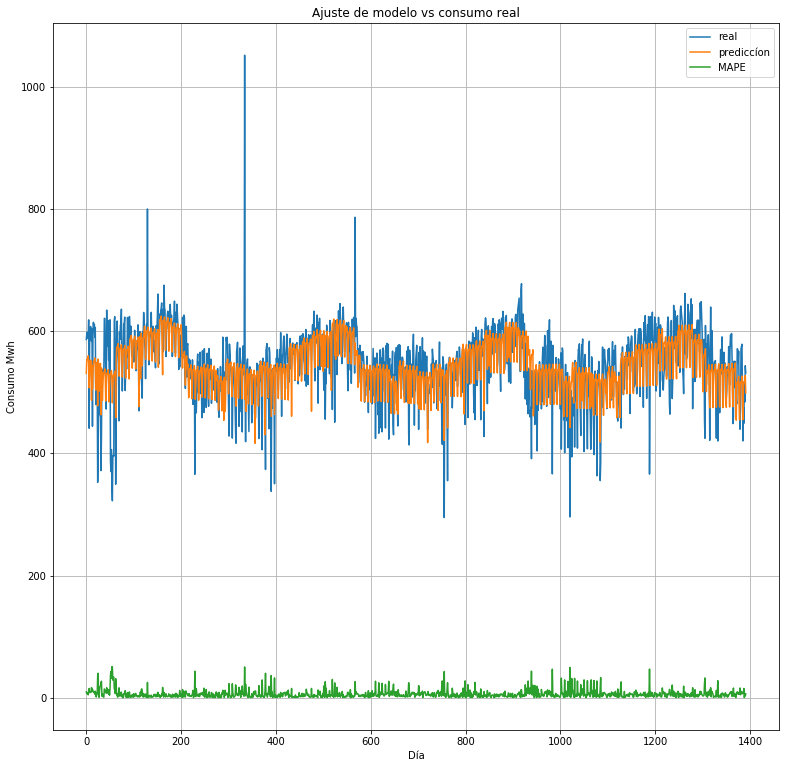

In [45]:
plt.figure(figsize=(13,13))
plt.plot(y, label='real')
plt.plot(y_pred, label='prediccíon')
plt.plot(map3, label="MAPE")
plt.xlabel("Día")
plt.ylabel("Consumo Mwh")
plt.title("Ajuste de modelo vs consumo real")
plt.grid(True)
plt.legend()
plt.show()

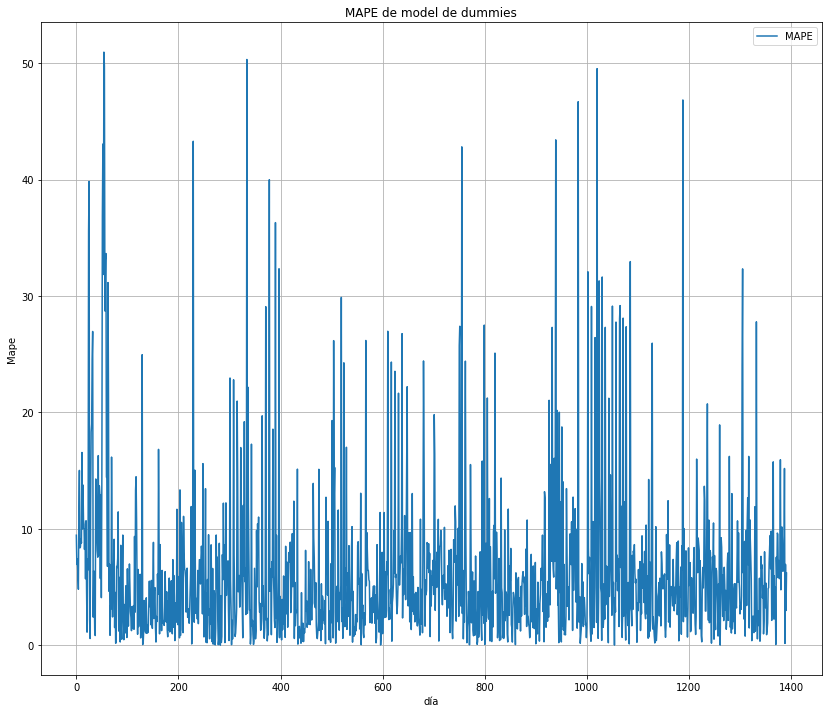

In [46]:
plt.figure(figsize=(14,12))
plt.plot(map3, label="MAPE")
plt.grid(True)
plt.xlabel("día")
plt.ylabel("Mape")
plt.legend(loc="best")
plt.title("MAPE de model de dummies")
plt.show()

In [50]:
mp50, _ = find_peaks(map3, height=50)
mp40, _ = find_peaks(map3, height=40)
mp30, _ = find_peaks(map3, height=30)
mp20, _ = find_peaks(map3, height=20)
mp10, _ = find_peaks(map3, height=10)

In [51]:
X= x3

In [52]:
X['dif'] = np.nan
l = []
for d in mp10:
    X.iloc[d] = X.iloc[d].replace(np.nan, -1)
for d in mp20:
    if X['dif'][d] == -1:
        X.iloc[d] = X.iloc[d].replace(-1, -2)
    else:
        X.iloc[d] = X.iloc[d].replace(np.nan, -2)
for d in mp30:
    if X['dif'][d] == -1:
        X.iloc[d] = X.iloc[d].replace(-1,-3)
    elif X['dif'][d]== -2:
        X.iloc[d] = X.iloc[d].replace(-2, -3)
    else:
        X.iloc[d] = X.iloc[d].replace(np.nan, -3)
for d in mp40:
    if X['dif'][d] == -1:
        X.iloc[d] = X.iloc[d].replace(-1, -4)
    elif X['dif'][d]== -2:
        X.iloc[d] = X.iloc[d].replace(-2, -4)
    elif X['dif'][d]== -3:
        X.iloc[d] = X.iloc[d].replace(-3,-4)
    else:
        X.iloc[d] = X.iloc[d].replace(np.nan, -4) 
for d in mp50:
    if X['dif'][d] == -1:
        X.iloc[d] = X.iloc[d].replace(-1, -5)
    elif X['dif'][d]== -2:
        X.iloc[d] = X.iloc[d].replace(-2, 5)
    elif X['dif'][d]== -3:
        X.iloc[d] = X.iloc[d].replace(-3,-5)
    elif X['dif'][d]== -4:
        X.iloc[d] = X.iloc[d].replace(-4,-5)
    else:
        X.iloc[d] = X.iloc[d].replace(np.nan, -5) 

X['dif'] = X['dif'].replace(np.nan, 0)

In [53]:
error=pd.DataFrame()

In [54]:
error['err'] = (y-y_pred)

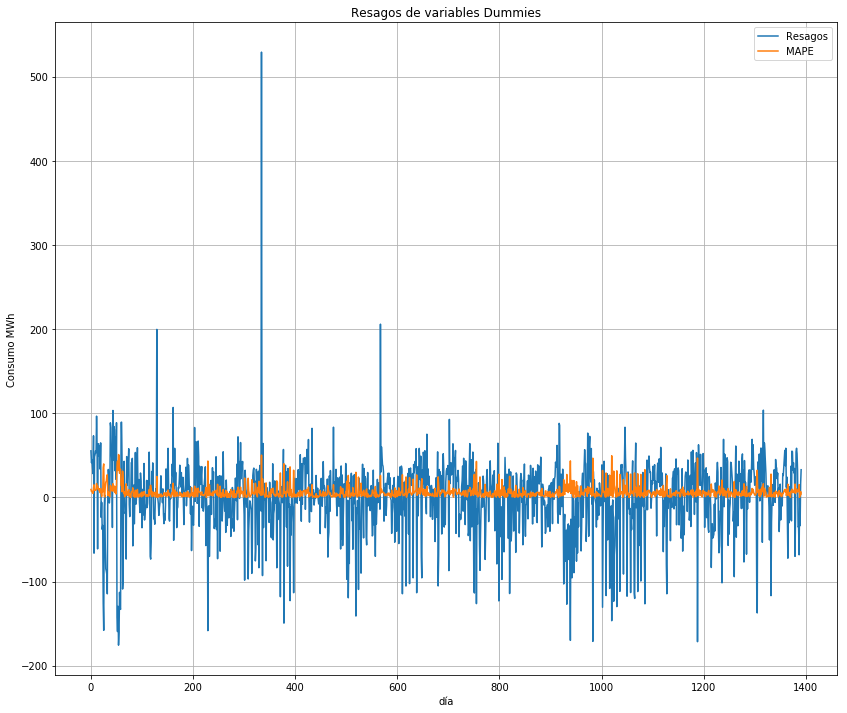

In [55]:
plt.figure(figsize=(14,12))
plt.plot(error, label="Resagos")
plt.plot(map3, label="MAPE")
plt.grid(True)
plt.xlabel("día")
plt.ylabel("Consumo MWh")
plt.legend(loc="best")
plt.title("Resagos de variables Dummies")
plt.show()

In [56]:
from pandas.plotting import autocorrelation_plot

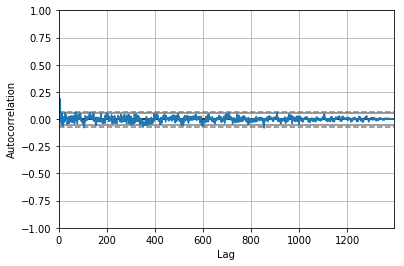

In [57]:
autocorrelation_plot(error);

In [58]:
from statsmodels.graphics.tsaplots import plot_pacf

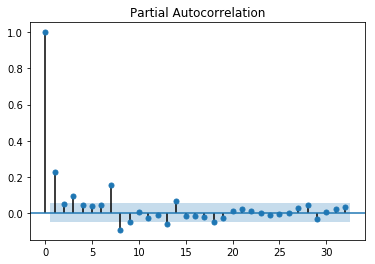

In [59]:
plot_pacf(error);

In [60]:
from  scipy import signal

Text(0, 0.5, 'PSD')

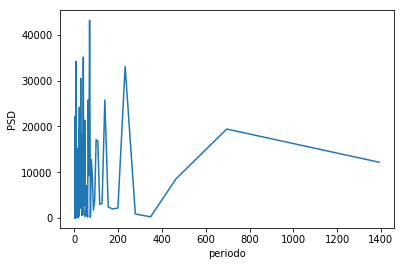

In [61]:
fs= 1
f, asd = signal.periodogram(error.err, fs)
plt.plot(1/f, asd)
plt.xlabel('periodo')
plt.ylabel('PSD')

In [62]:
def get_max_pts(x):
    peaks, _ = find_peaks(z, height=4000)
    pk = peaks[1:-1]
    return peaks

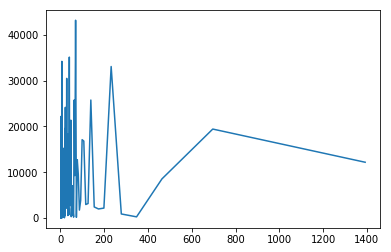

In [63]:
z = plt.plot(1/f, asd)

In [64]:
peaks, _ = find_peaks(asd, height=30000)

In [65]:
len(peaks)

5

In [66]:
peaks

array([  6,  20,  34,  48, 203], dtype=int64)

In [67]:
pk = peaks

In [68]:
J = pd.DataFrame()

In [69]:
t = np.arange(1392)

In [70]:
for i  in pk:
    J[f"{i}_sen"] = np.abs(np.sin((t*2*np.pi)/i))
    J[f"{i}_cos"] = np.abs(np.cos((t*2*np.pi)/i))
J.shape

(1392, 10)

In [71]:
n = []
for i in range(len(J.columns)*len(x3.columns)):
    n.append(i)

In [72]:
kron2 = pd.DataFrame(columns =n)
kron2

,0,1,2,3,4,5,6,7,8,9,...,360,361,362,363,364,365,366,367,368,369


In [73]:
#x2

In [74]:
for c in range(1392):
    k = []
    for i in J.loc[c]:
        for j in x3.loc[c]:
            k.append(i*j)

        o = pd.Series(k)
        kron2.loc[c] = o
kron2.head()

,0,1,2,3,4,5,6,7,8,9,...,360,361,362,363,364,365,366,367,368,369
0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0
1,1.732051e+00,0.0,0.0,8.660254e-01,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.999521,0.0
2,5.196152e+00,0.0,0.0,1.732051e+00,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.998085,0.0
3,1.469576e-15,0.0,0.0,3.673940e-16,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.995692,0.0
4,1.732051e+01,0.0,0.0,0.000000e+00,3.464102,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.992346,0.0


In [75]:
for i in n:
    kron2 =kron2.rename(columns={i:'b{}'.format(i)})

In [222]:
#J = J.reset_index()
#J = J.drop('index', axis=1)

In [76]:
x3 = X

In [77]:
X = kron2

In [78]:
X0 = pd.concat([X, J], axis=1)
#X0

In [79]:
X = pd.concat([X0, x3], axis=1)
#X.head()

In [80]:
#for i in X.columns:
    #if i == 'ones':
        #X = X.drop(i , axis=1)
    

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.015, shuffle=False)

In [83]:
#x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.5, shuffle=False)

In [84]:
nmod2 = LinearRegression(fit_intercept=True, n_jobs=-1, normalize=True)
nmod2.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

In [85]:
y_pred3 = nmod2.predict(x_test)
map2 = MAPE(y_test, y_pred3)
map2

6.658201375395272

In [86]:
map4 = MAPE_hor(y_test, y_pred3)

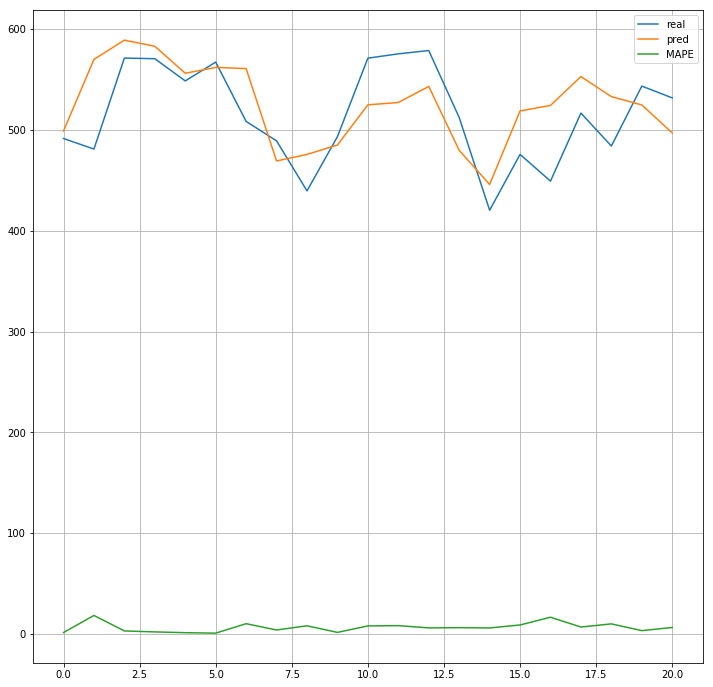

In [87]:
plt.figure(figsize=(12,12))
plt.plot(y_test, label='real')
plt.plot(y_pred3, label='pred')
plt.plot(map4, label='MAPE')
plt.grid(True)
plt.legend()
plt.show()

In [88]:
lasso = Lasso(fit_intercept=False)
y_pred_lasso = lasso.fit(x_train, y_train).predict(x_test)

In [89]:
mplas = MAPE(y_test, y_pred_lasso)
mplas

6.772732922274416

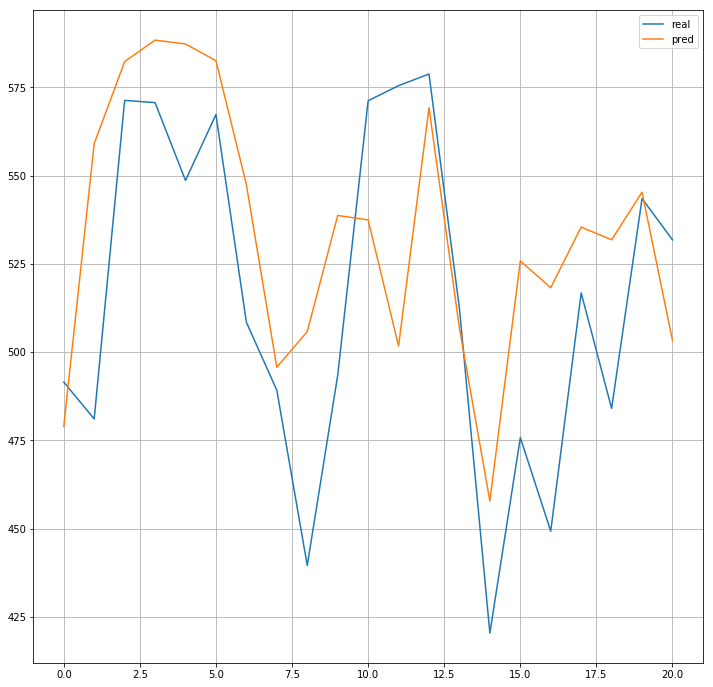

In [90]:
plt.figure(figsize=(12,12))
plt.plot(y_test, label='real')
plt.plot(y_pred_lasso, label='pred')
plt.grid(True)
plt.legend()
plt.show()

In [91]:
nmod2= LinearRegression()
nmod2.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [92]:
y_prd = nmod2.predict(X)
Mpee = MAPE(y, y_prd)
Mpee

4.349827959259398

In [93]:
mpe5 = MAPE_hor(y, y_prd)

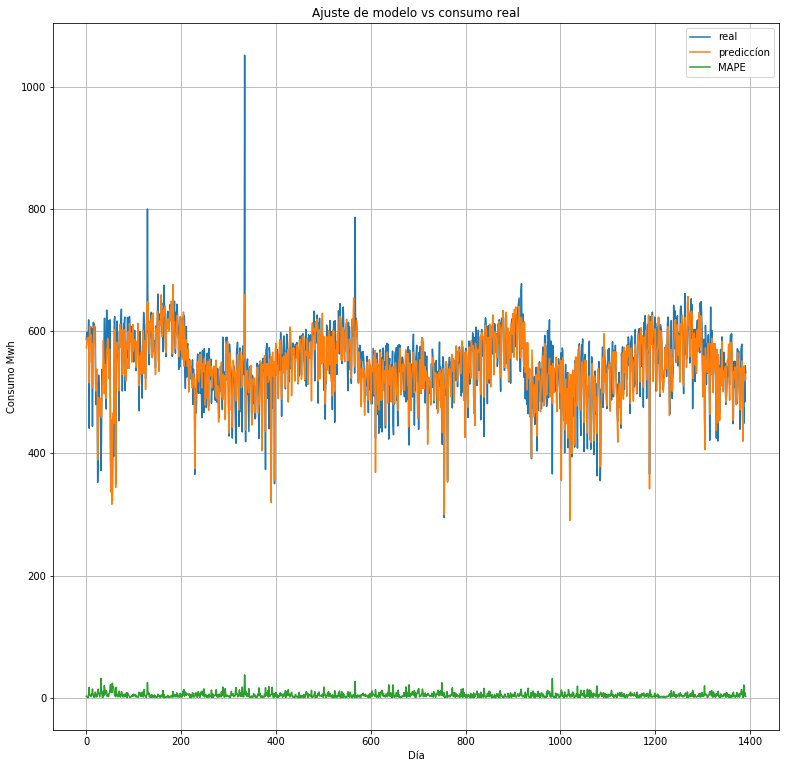

In [94]:
plt.figure(figsize=(13,13))
plt.plot(y, label='real')
plt.plot(y_prd, label='prediccíon')
plt.plot(mpe5, label="MAPE")
plt.xlabel("Día")
plt.ylabel("Consumo Mwh")
plt.title("Ajuste de modelo vs consumo real")
plt.grid(True)
plt.legend()
plt.show()

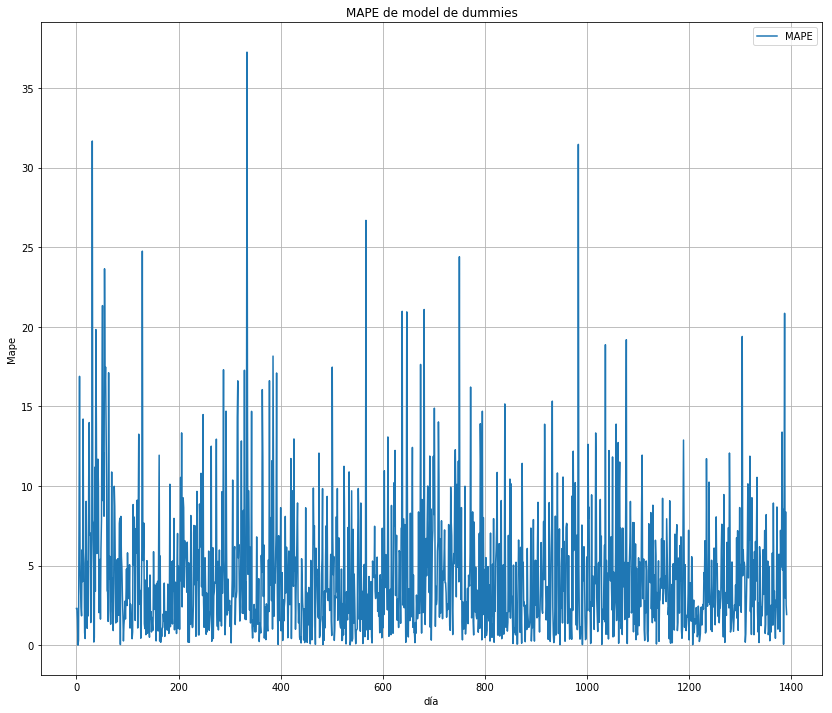

In [95]:
plt.figure(figsize=(14,12))
plt.plot(mpe5, label="MAPE")
plt.grid(True)
plt.xlabel("día")
plt.ylabel("Mape")
plt.legend(loc="best")
plt.title("MAPE de model de dummies")
plt.show()

In [108]:
c = ["mape"]
lk = pd.DataFrame(mpe5, columns=c)
lk = lk.query('mape >= 30')

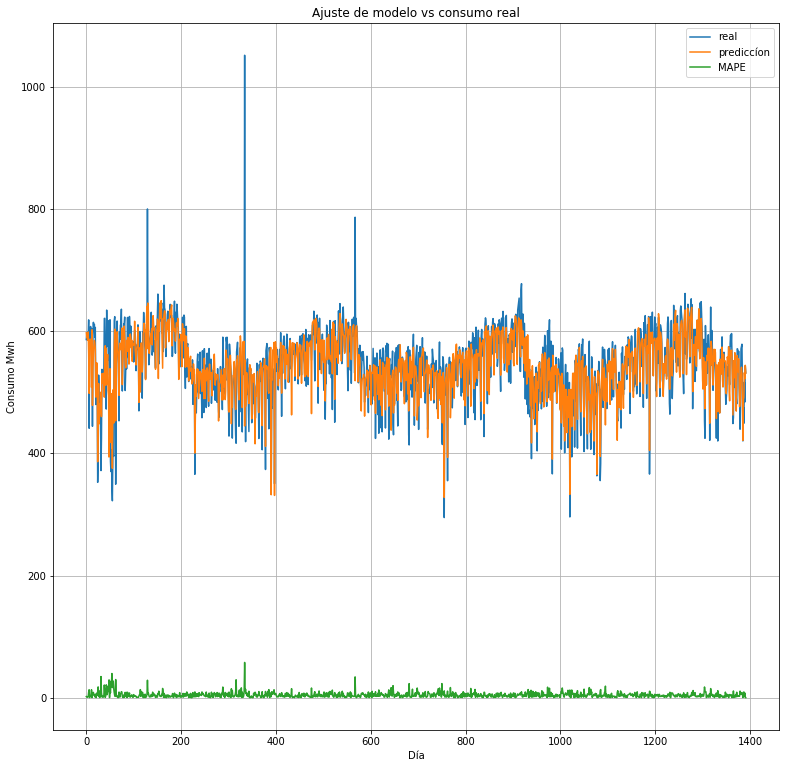

In [145]:
plt.figure(figsize=(13,13))
plt.plot(y, label='real')
plt.plot(y_pred100, label='prediccíon')
plt.plot(map110, label="MAPE")
plt.xlabel("Día")
plt.ylabel("Consumo Mwh")
plt.title("Ajuste de modelo vs consumo real")
plt.grid(True)
plt.legend()
plt.show()

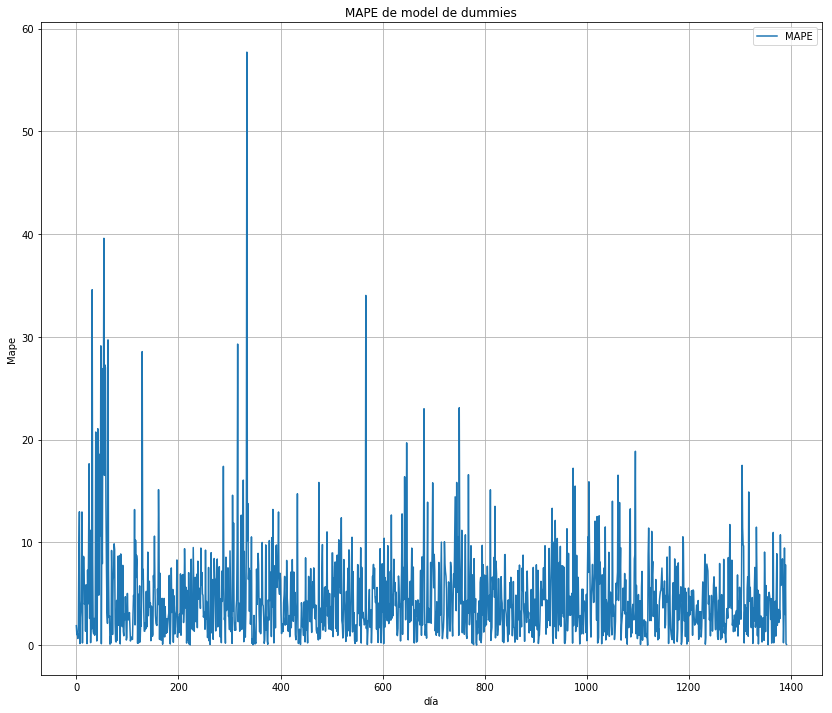

In [146]:
plt.figure(figsize=(14,12))
plt.plot(map110, label="MAPE")
plt.grid(True)
plt.xlabel("día")
plt.ylabel("Mape")
plt.legend(loc="best")
plt.title("MAPE de model de dummies")
plt.show()

In [97]:
map110.max().index()

NameError: name 'map110' is not defined

In [147]:
nmod101 = LinearRegression()
y_pred101 = nmod101.fit(x_train, y_train).predict(x_test)

In [151]:
map101 = MAPE(y_test, y_pred101)
map111 = MAPE_hor(y_test, y_pred101)
map101

6.759495377241852

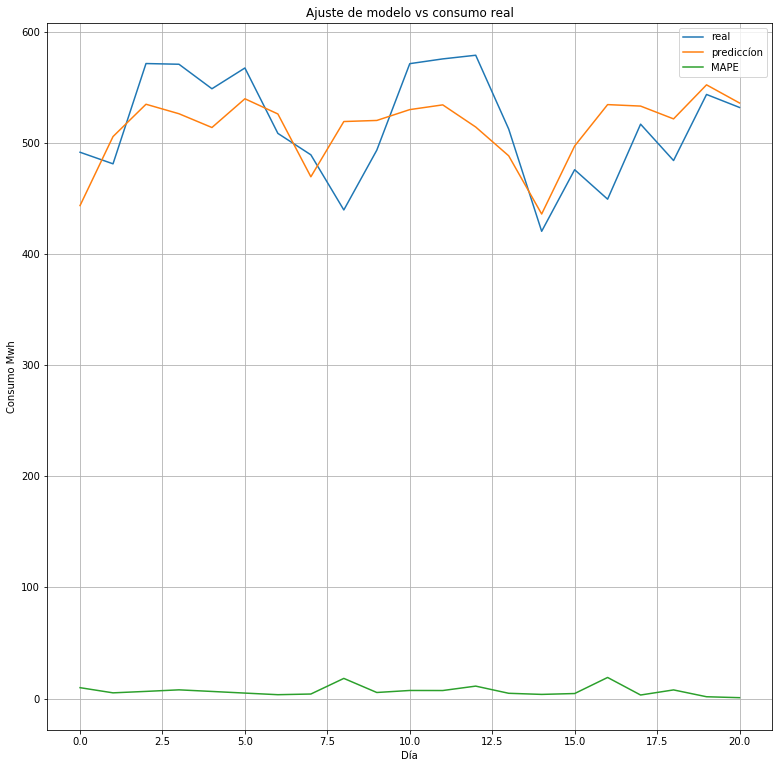

In [152]:
plt.figure(figsize=(13,13))
plt.plot(y_test, label='real')
plt.plot(y_pred101, label='prediccíon')
plt.plot(map111, label="MAPE")
plt.xlabel("Día")
plt.ylabel("Consumo Mwh")
plt.title("Ajuste de modelo vs consumo real")
plt.grid(True)
plt.legend()
plt.show()

In [164]:
Xreg = XGBRegressor(fit_intercept=False)
y_pd4 = Xreg.fit(x_train, y_train).predict(x_test)

[10:18:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


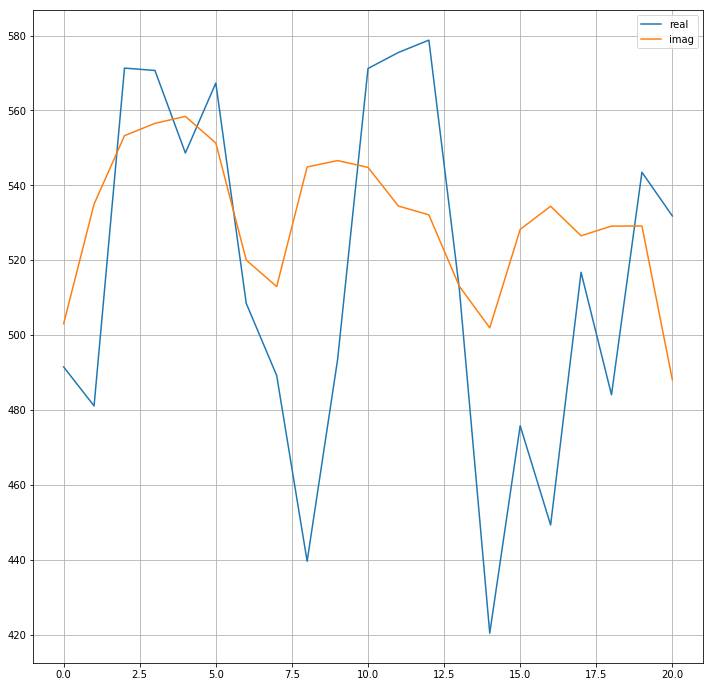

In [165]:
plt.figure(figsize=(12,12))
plt.plot(y_test, label='real')
plt.plot(y_pd4, label='imag')
plt.grid(True)
plt.legend()
plt.show()